# 业务：

# A、客群预测--机器学习模型

# B、广告投放途径--aws、反正统计工具就ok

--------------------------------------------------------------------------------------------------------------------

# *本文对应A的详细实现过程

# 1、数据清洗:excel+py

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from openpyxl import Workbook
%matplotlib inline

## excel处理后导入：
①处理逻辑--按对业务目标，也就是我们选取的label（标签）的影响分维度筛选变量，删除与业务目标无关变量     【*label：'签约钱生钱理财标志'】

②保留维度包括：客户个人信息与账户存量状况(客户号、性别、账户数量、资产负债等）；账户交易信息（交易总量、存贷款、理财、消费等）

*保留依据：根据我们对业务的理解，签约理财的影响因素：（直接/表象）目前理财偏好-->（间接/本质）消费、存贷款习惯-->（更间接/更本质）客观资产状况与用户个人信息

③分维度筛选后于excel中形成五张细化分类后变量sheet，用以存放不同类别的feature(特征）--客户个人信息、交易总量、存款贷款、理财、消费（便于后续分开进行特征工程）【变量依次编号catagory1、2、3、4、5;数据依次编号data1、2、3、4、5】&一张汇总变量sheet（便于最后进行综合模型训练）【编号catagory0；data0】

④A客群定位的机器学习主要采用类别1、3、4、5的变量和数据;eg.data1345=data1+data3+data4+data5

B统计主要采用2数据

In [3]:
#读入初步筛选处理后excel sheet-->dataframe
data1345=pd.read_excel(r"D:\data analytics\fintech作业\大作业\data.xlsx",sheet_name=6)

In [4]:
data1345.drop([0],axis=0,inplace=True)

In [5]:
data1345.dropna(inplace=True)#将缺失值过滤

In [6]:
data1345

,客户号,性别,客户价值等级,客户持有帐户数量,客户持有的全部产品数量（24种产品）,资产总额,最近3个月客户月平均资产总计,最近6个月客户月平均资产总计,负债总额,最近3个月客户月平均负债总计,...,本月储蓄卡消费金额,最近三个月储蓄卡月均消费金额,最近三个月储蓄卡月均消费次数,最近三个月储蓄卡月均取现金额,最近三个月储蓄卡月均取现次数,最近六个月储蓄卡月均消费金额,最近六个月储蓄卡月均消费次数,最近六个月储蓄卡月均取现金额,最近六个月储蓄卡月均取现次数,签约钱生钱理财标志
1,1000000015,1,E,18,10,692472.15,724124.61667,1238845.8267,0,0,...,0,13750,1,0,0,233875.22,9,0,0,N
2,1000000024,2,F,34,8,1940264.01,1744167.1933,1393463.6417,220403.03,224464.69333,...,0,2000,1,0,0,61400,14,0,0,N
3,1000000033,2,G,12,10,12388909.47,12157314.583,11813166.588,0,0,...,5170.15,22126.55,15,0,0,22126.55,15,0,0,1
4,1000000066,2,B,6,0,1006.72,1007.086667,1006.826667,0,172347.82667,...,0,0,0,0,0,0,0,0,0,N
5,1000000071,2,C,27,10,96028.75,75804.536667,136479.78167,4112466.94,4120931.1533,...,23550,37492.21,11,0,0,81030.94,26,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43966,1009395604,2,D,3,5,494853.09,443404.12667,225702.94333,0,0,...,0,0,0,0,0,0,0,0,0,1
43967,1009395772,2,B,12,3,19783.84,33222.716667,43572.115,0,0,...,6000,11000,4,0,0,11000,4,0,0,N
43968,1009396979,2,B,6,1,7762.24,5744.99,8650.941667,0,0,...,17600,32600,10,0,0,49300,16,0,0,N
43969,1009397034,1,B,5,0,5826.63,5825.49,5822.495,0,0,...,0,0,0,0,0,0,0,0,0,N


In [7]:
data1345['签约钱生钱理财标志']=data1345['签约钱生钱理财标志'].replace('N',0)
#将N-->0,转化为二元分类（0，1）


In [8]:
data1345

,客户号,性别,客户价值等级,客户持有帐户数量,客户持有的全部产品数量（24种产品）,资产总额,最近3个月客户月平均资产总计,最近6个月客户月平均资产总计,负债总额,最近3个月客户月平均负债总计,...,本月储蓄卡消费金额,最近三个月储蓄卡月均消费金额,最近三个月储蓄卡月均消费次数,最近三个月储蓄卡月均取现金额,最近三个月储蓄卡月均取现次数,最近六个月储蓄卡月均消费金额,最近六个月储蓄卡月均消费次数,最近六个月储蓄卡月均取现金额,最近六个月储蓄卡月均取现次数,签约钱生钱理财标志
1,1000000015,1,E,18,10,692472.15,724124.61667,1238845.8267,0,0,...,0,13750,1,0,0,233875.22,9,0,0,0
2,1000000024,2,F,34,8,1940264.01,1744167.1933,1393463.6417,220403.03,224464.69333,...,0,2000,1,0,0,61400,14,0,0,0
3,1000000033,2,G,12,10,12388909.47,12157314.583,11813166.588,0,0,...,5170.15,22126.55,15,0,0,22126.55,15,0,0,1
4,1000000066,2,B,6,0,1006.72,1007.086667,1006.826667,0,172347.82667,...,0,0,0,0,0,0,0,0,0,0
5,1000000071,2,C,27,10,96028.75,75804.536667,136479.78167,4112466.94,4120931.1533,...,23550,37492.21,11,0,0,81030.94,26,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43966,1009395604,2,D,3,5,494853.09,443404.12667,225702.94333,0,0,...,0,0,0,0,0,0,0,0,0,1
43967,1009395772,2,B,12,3,19783.84,33222.716667,43572.115,0,0,...,6000,11000,4,0,0,11000,4,0,0,0
43968,1009396979,2,B,6,1,7762.24,5744.99,8650.941667,0,0,...,17600,32600,10,0,0,49300,16,0,0,0
43969,1009397034,1,B,5,0,5826.63,5825.49,5822.495,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data1=pd.read_excel(r"D:\data analytics\fintech作业\大作业\data.xlsx",sheet_name=1)



In [10]:
data2=pd.read_excel(r"D:\data analytics\fintech作业\大作业\data.xlsx",sheet_name=2)

In [11]:
data3=pd.read_excel(r"D:\data analytics\fintech作业\大作业\data.xlsx",sheet_name=3)

In [12]:
data4=pd.read_excel(r"D:\data analytics\fintech作业\大作业\data.xlsx",sheet_name=4)

In [13]:
data5=pd.read_excel(r"D:\data analytics\fintech作业\大作业\data.xlsx",sheet_name=5)

In [16]:
#提取变量名，列表分类+汇总储存
all_data=load_workbook(r"D:\data analytics\fintech作业\大作业\variable.xlsx")
lt=[]
for i in range(0,6):
    sheet=all_data[str(i)]
    lt2=[]
    for y in range(1,sheet.max_column+1):
        lt2.append(sheet.cell(1,y).value)
    lt.append(lt2)

cat_0,cat_1,cat_2,cat_3,cat_4,cat_5=lt[0],lt[1],lt[2],lt[3],lt[4],lt[5]
print(cat_0)

['客户号', '性别', '客户价值等级', '客户持有帐户数量', '客户持有的全部产品数量（24种产品）', '资产总额', '最近3个月客户月平均资产总计', '最近6个月客户月平均资产总计', '负债总额', '最近3个月客户月平均负债总计', '最近6个月客户月平均负债总计', '本期账户借方交易金额', '本期账户借方交易次数', '最近三个月内账户借方月均交易金额', '最近三个月内账户借方月均交易次数', '最近六个月内账户借方月均交易金额', '最近六个月内账户借方月均交易次数', '本期账户贷方交易金额', '本期账户贷方交易次数', '最近三个月内账户贷方月均交易金额', '最近三个月内账户贷方月均交易次数', '最近六个月内账户贷方月均交易金额', '最近六个月内账户贷方月均交易次数', '最近三个月储蓄卡非乐收银月均消费金额', '最近三个月储蓄卡非乐收银月均消费次数', '最近三个月储蓄卡乐收银月均消费金额', '最近三个月储蓄卡乐收银月均消费次数', '最近六个月储蓄卡非乐收银月均消费金额', '最近六个月储蓄卡非乐收银月均消费次数', '最近六个月储蓄卡乐收银月均消费金额', '最近六个月储蓄卡乐收银月均消费次数', '本月储蓄卡乐收银消费金额', '本月储蓄卡乐收银消费次数', '本月储蓄卡非乐收银消费金额', '本月储蓄卡非乐收银消费次数', '本期柜台购买基金金额', '本期柜台购买基金笔数', '三个月内柜台购买基金月均金额', '三个月内柜台购买基金月均笔数', '六个月内柜台购买基金月均金额', '六个月内柜台购买基金月均笔数', '本期柜台购买理财金额', '本期柜台购买理财笔数', '三个月内柜台购买理财月均金额', '三个月内柜台购买理财月均笔数', '六个月内柜台购买理财月均金额', '六个月内柜台购买理财月均笔数', '本期柜台购买国债金额', '本期柜台购买国债笔数', '三个月内柜台购买国债月均金额', '三个月内柜台购买国债月均笔数', '六个月内柜台购买国债月均金额', '六个月内柜台购买国债月均笔数', '本期网银购买基金金额', '本期网银购买基金笔数', '三个月内网银购买基金月均金额', '三个月内网银购买基金月均笔数', '六个月内网银购买基金月均金额', '六个月内网银购买基金月均笔数', 

# 2、数据探索与特征工程（一）：数据特征&相关性

In [17]:
#滤除含有NaN值的所有行
for i in [data1,data2,data3,data4,data5]:
    i.dropna(inplace=True)
    i.drop([0],axis=0,inplace=True)

1、在事先变量特征分类基础上，对不同数据变量进行数据特征的探索

2、选取五大类变量中，与目标标签相关性较强的特征--
选择方法：通过信息增益计算相关性筛选

具体选择比例为：cat_1 选前35%

cat_3 选前10%

cat_4 选前45%

cat_5 选前10%

In [18]:
import seaborn as sns
import numpy as np
sns.set(font='SimHei')

## ①客户个人信息与资产负债存量--对应之前编号1

In [19]:
data1

,客户号,性别,客户价值等级,客户持有帐户数量,客户持有的全部产品数量（24种产品）,资产总额,最近3个月客户月平均资产总计,最近6个月客户月平均资产总计,负债总额,最近3个月客户月平均负债总计,最近6个月客户月平均负债总计,签约钱生钱理财标志
1,1000000015,1,E,18,10,692472.15,724124.61667,1238845.8267,0,0,0,N
2,1000000024,2,F,34,8,1940264.01,1744167.1933,1393463.6417,220403.03,224464.69333,222433.86167,N
3,1000000033,2,G,12,10,12388909.47,12157314.583,11813166.588,0,0,0,1
4,1000000066,2,B,6,0,1006.72,1007.086667,1006.826667,0,172347.82667,86173.913333,N
5,1000000071,2,C,27,10,96028.75,75804.536667,136479.78167,4112466.94,4120931.1533,4116699.0467,1
...,...,...,...,...,...,...,...,...,...,...,...,...
43966,1009395604,2,D,3,5,494853.09,443404.12667,225702.94333,0,0,0,1
43967,1009395772,2,B,12,3,19783.84,33222.716667,43572.115,0,0,0,N
43968,1009396979,2,B,6,1,7762.24,5744.99,8650.941667,0,0,0,N
43969,1009397034,1,B,5,0,5826.63,5825.49,5822.495,0,0,0,N


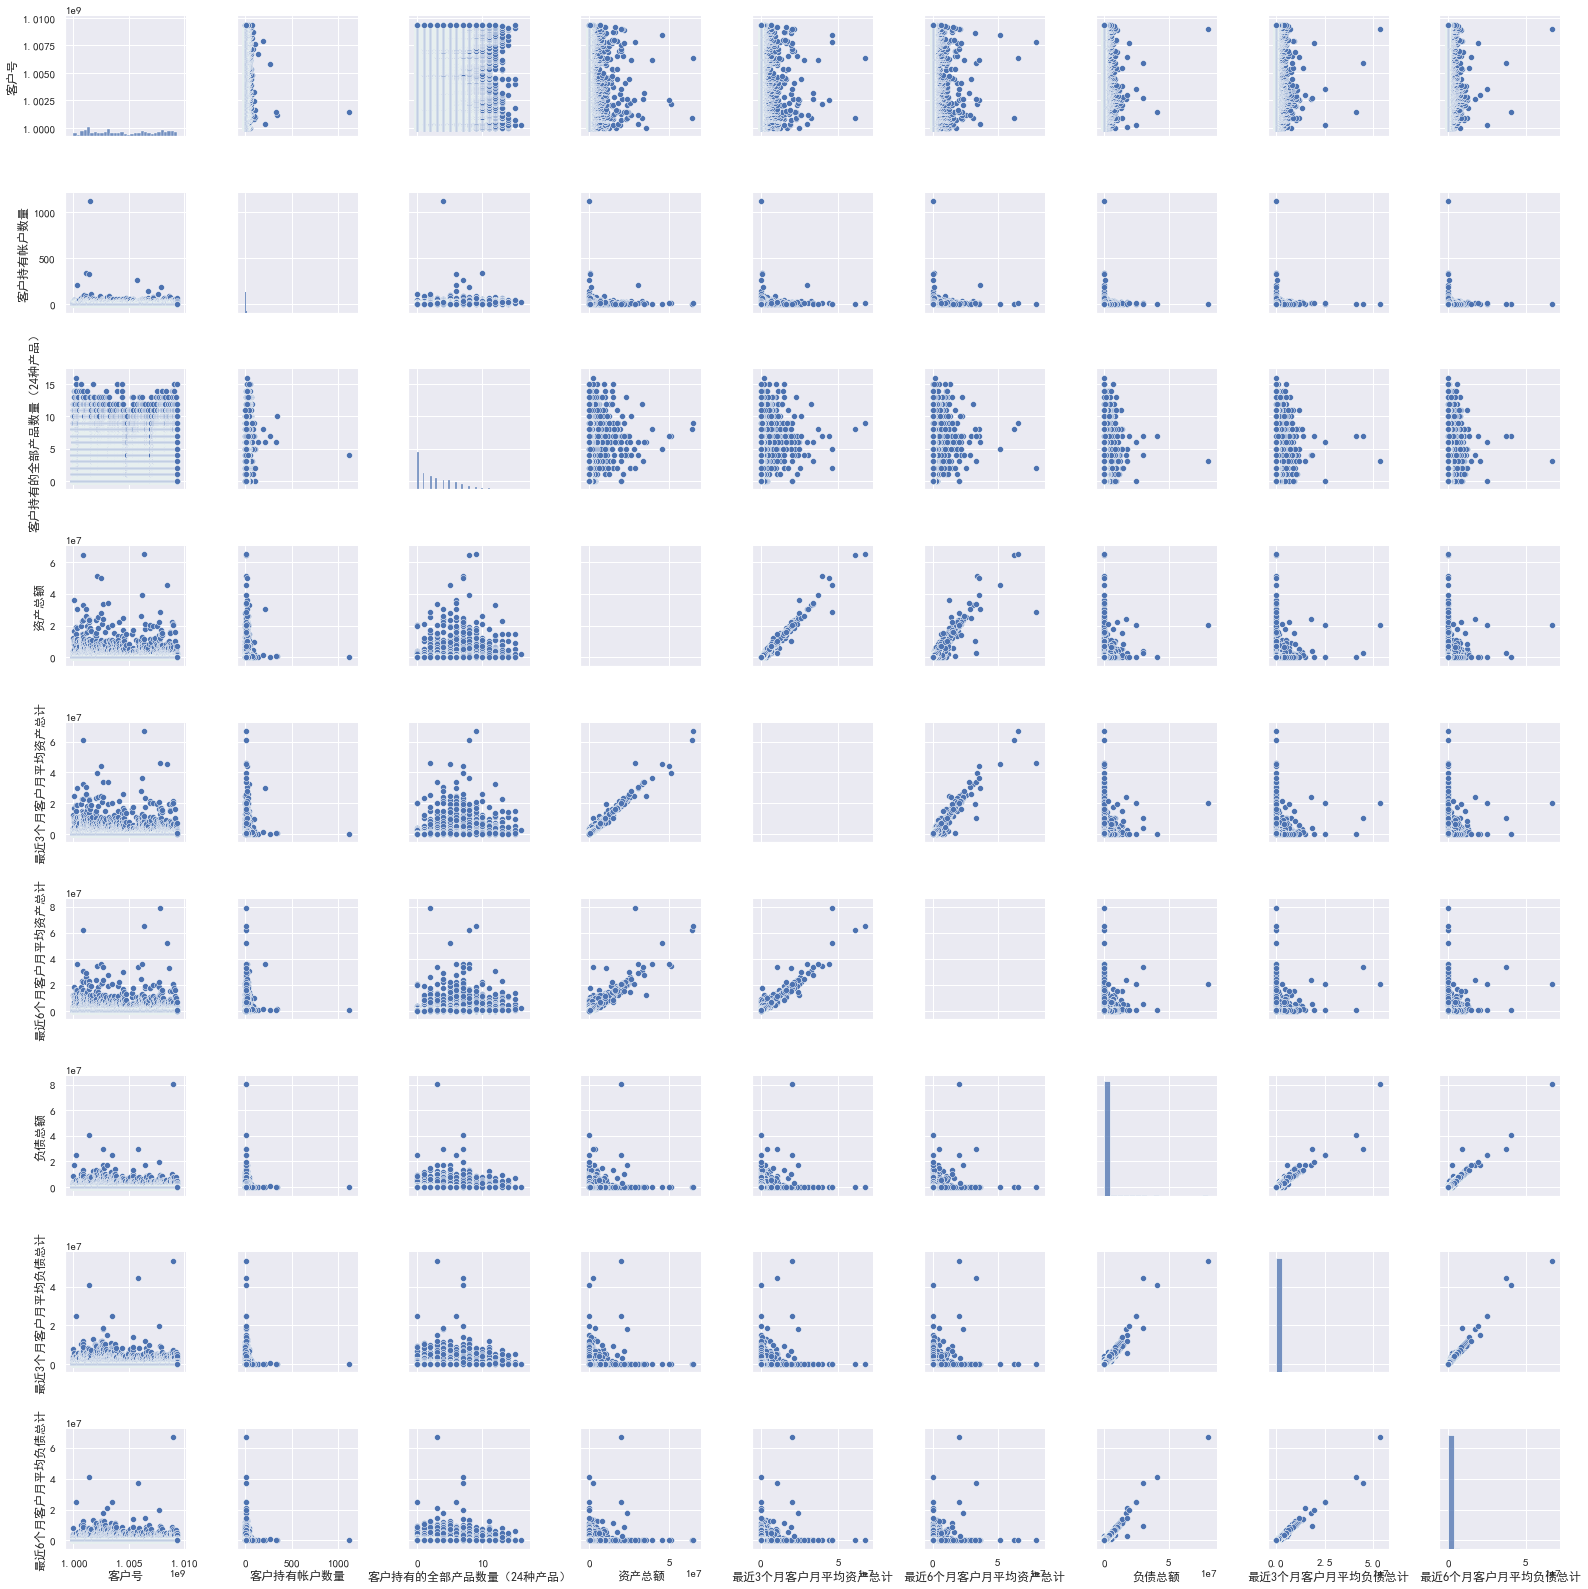

In [28]:
#客户个人信息类变量--
#连续变量之间的相关性特征，以类别1变量为例，看一下就好；后面类别的数据探索涉及变量数较多，画这种图不好看
sns.pairplot(data1)
    

In [20]:
#各特征与离散标签之间的相关性--通过信息增益的方法实现
import pandas as pd
import numpy as np
 
 # 信息熵
def info_entropy(attr):
    prob = pd.value_counts(attr) / len(attr)   # 对于一个特征不同类所占的比例类
    return sum( np.log2( prob )* prob * (-1) )  # 经验熵
 
 
 
# 信息增益   （返回值越大，attr1 与 attr2 相关性越强）
def info_gain(dataset, attr1, attr2):
    ent1= dataset.groupby(attr1).apply(lambda x: info_entropy(x[attr2]))
    prob = pd.value_counts(dataset[attr1]) / len(dataset[attr1])
    ent2= sum( ent1 * prob )                   # 经验条件熵
    return info_entropy(dataset[attr2]) - ent2     #  信息增益

a,lt={},[]

for i in cat_1[1:-1]:
    result=info_gain(data1,str(i),'签约钱生钱理财标志')
    lt.append(result)
    a[i]=result #不同变量i与目标标签的相关性
    
lt.sort(reverse=True)#降序
length=round(len(lt)*0.35)#择取相关性前35%的变量特征
b1={x:y for x,y in a.items() if y in lt[:length+1]}
print("1类变量与目标标签之间的相关性：",b1) #最终，该类别下，变量特征的选取情况【筛选后】

                    
    

1类变量与目标标签之间的相关性： {'客户价值等级': 0.20815453253598876, '客户持有的全部产品数量（24种产品）': 0.2519165366046623, '资产总额': 0.6745270349400735, '最近3个月客户月平均资产总计': 0.67697633728151, '最近6个月客户月平均资产总计': 0.6787063477282165}


In [21]:
#画图体现与标签相关性，函数体设定
def relativity_pic(dic):
    feature_d=dict(sorted(dic.items(),key=lambda x:x[1],reverse=True))
    feature,relativity=[],[]
    for x,y in feature_d.items():
        feature.append(x)
        relativity.append(y)
    font={'family':'SimHei','weight':'bold','size':'12'}
    plt.rc('font',**font)
    plt.rc('axes',unicode_minus=False)
    l_f,l_r=len(feature),len(relativity)

    plt.figure(figsize=(22,11),dpi=80)
    plt.barh(range(l_f),relativity,height=1,color='pink')
    plt.yticks(range(l_r),feature)

    plt.grid(alpha=0.3)
    plt.xlabel('与标签相关程度')
    plt.ylabel('特征')
    plt.title('变量特征与标签相关程度示意图')
    plt.show()


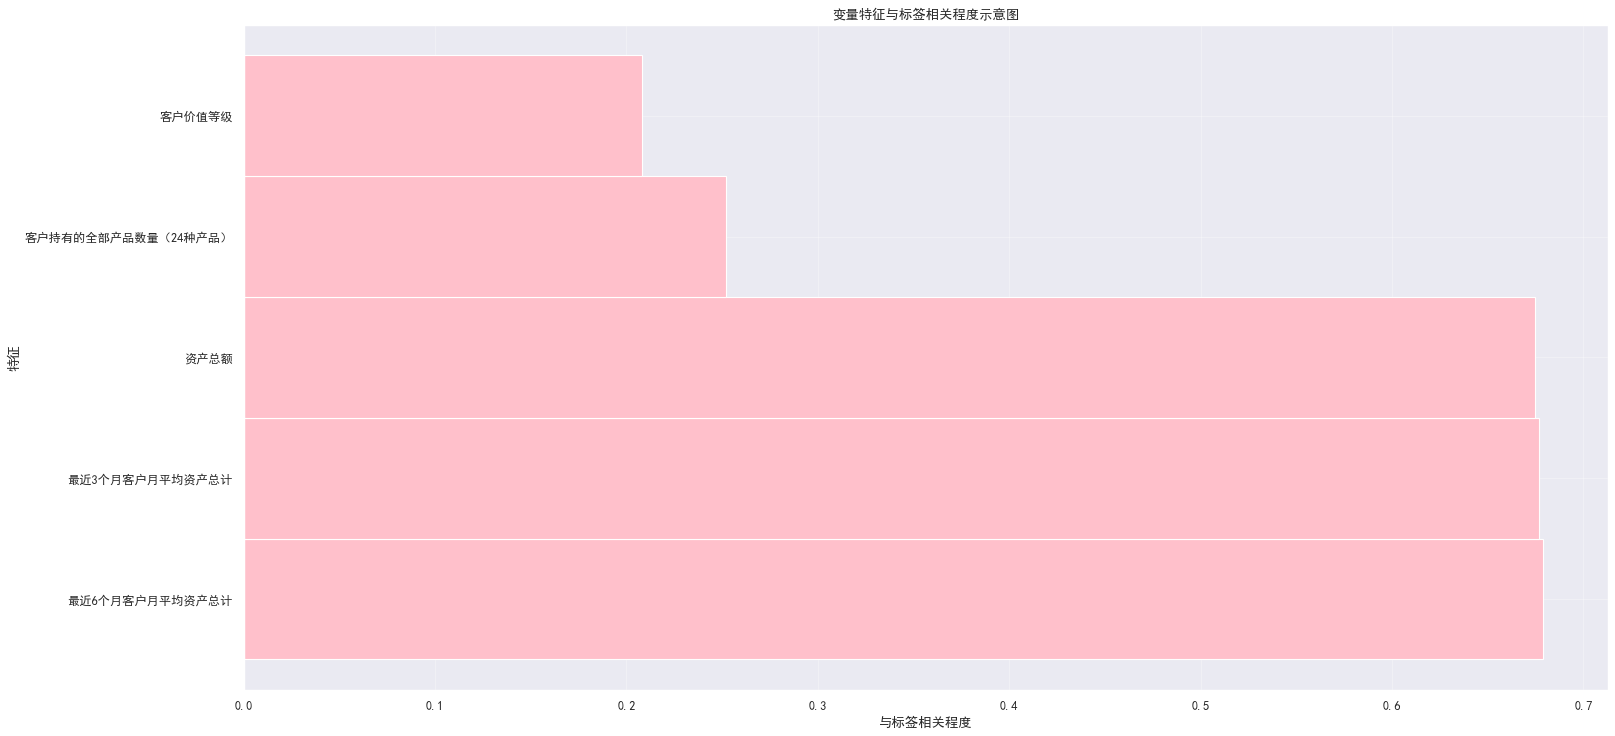

In [22]:
relativity_pic(b1)

## ②存款贷款--对应分类编号3

In [23]:
a,lt={},[]
for i in cat_3[:-1]:
    result=info_gain(data3,i,'签约钱生钱理财标志')
    lt.append(result)
    a[i]=result
    
lt.sort(reverse=True)#降序
length=round(len(lt)*0.45)
b3={i:j for i,j in a.items() if j in lt[:length+1]}
print("3类变量与目标标签之间的相关性：",b3)

3类变量与目标标签之间的相关性： {'存款金额': 0.6701670788205848, '3个月存款月日均金额': 0.675448641765414, '6个月存款月日均金额': 0.6783424632615347, '活期存款最近开户距今月份': 0.15566376949893035, '活期存款平均开户时长': 0.15218907097188727, '三个月月平均持有外币余额': 0.12972211795202082, '六个月月平均持有外币余额': 0.13267846235380532, '本期持有本币余额': 0.503597042141881, '三个月月平均持有本币余额': 0.6608550184704043, '六个月月平均持有本币余额': 0.6695973303724112, '本期本币新增余额': 0.5029228952325966, '三个月月平均本币新增余额': 0.5744378285614249, '六个月月平均本币新增余额': 0.6324115884197895, '本月活期存款月日均余额': 0.6698756560428024, '最近三个月活期存款月日均余额': 0.6706709210571753, '最近六个月活期存款月日均余额': 0.674154123624705}


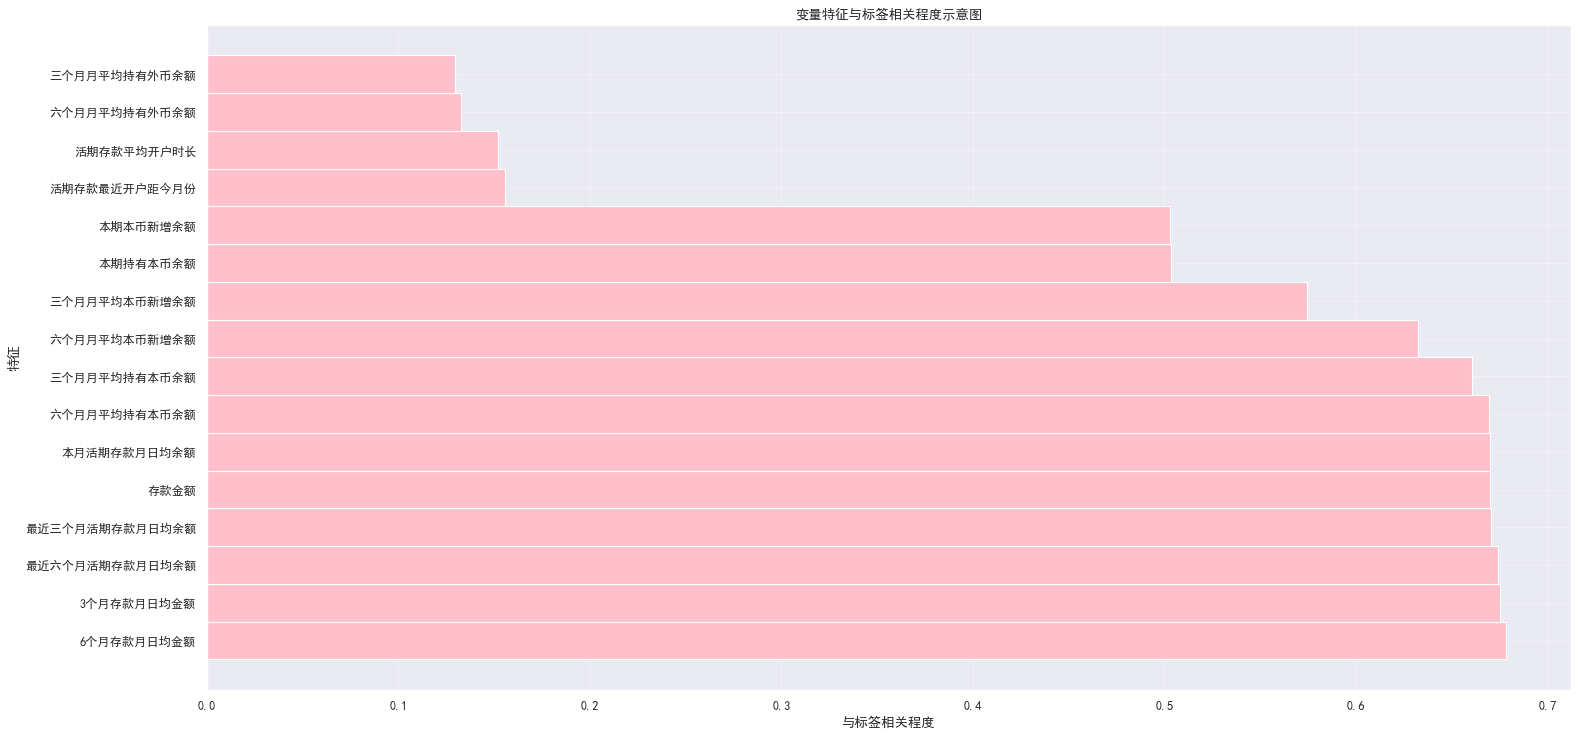

In [25]:
relativity_pic(b3)

## ③理财--对应分类编号4

In [26]:
a,lt={},[]
for i in cat_4[:-1]:
    result=info_gain(data4,i,'签约钱生钱理财标志')
    lt.append(result)
    a[i]=result
    
lt.sort(reverse=True)#降序
length=round(len(lt)*0.1)
b4={i:j for i,j in a.items() if j in lt[:length+1]}
print("4类变量与目标标签之间的相关性：",b4)

4类变量与目标标签之间的相关性： {'理财金额': 0.40201934754390706, '3个月理财月日均金额': 0.46236615141957427, '6个月理财月日均金额': 0.5562782663547414}


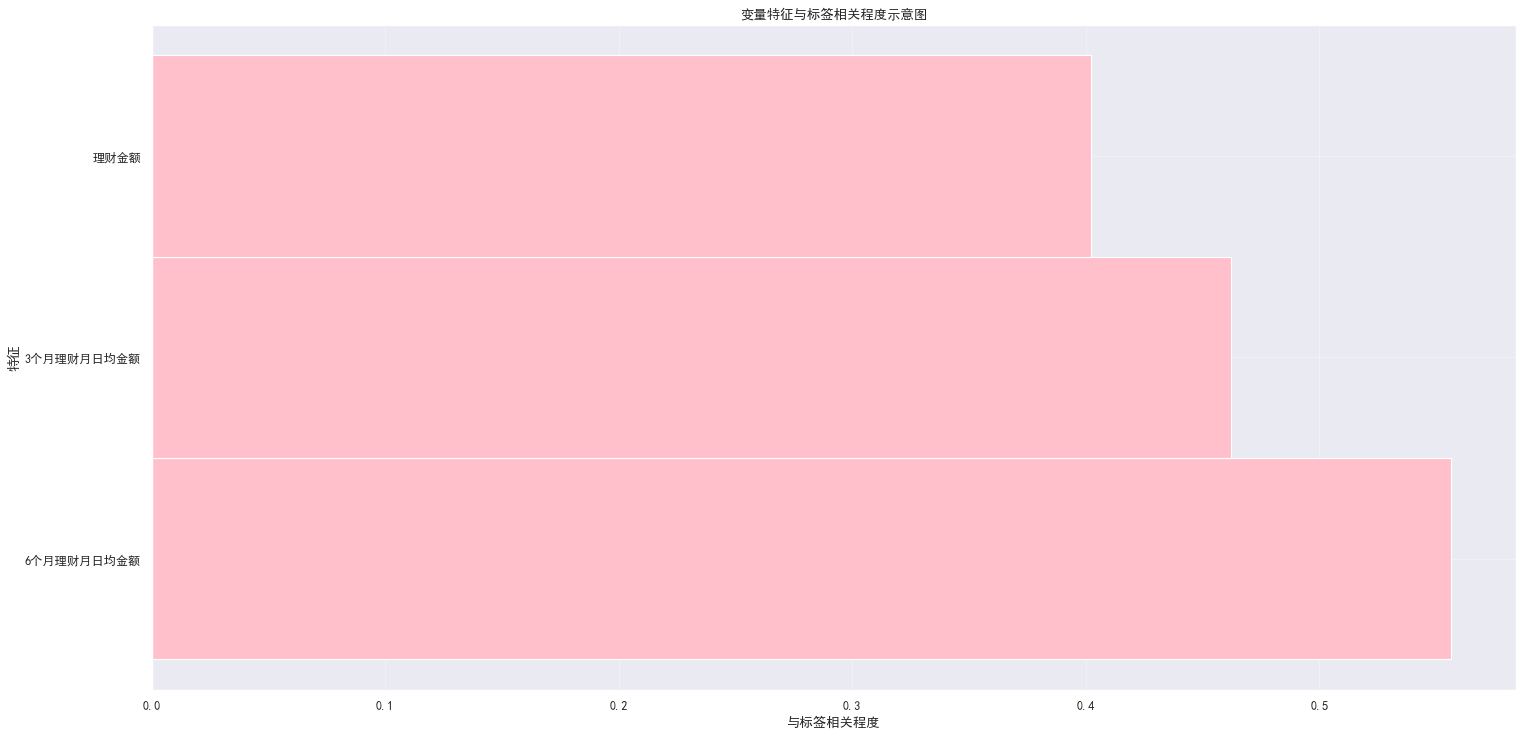

In [27]:
relativity_pic(b4)

## ④消费--对应编号5

In [28]:
a,lt={},[]
for i in cat_5[:-1]:
    result=info_gain(data5,i,'签约钱生钱理财标志')
    lt.append(result)
    a[i]=result
    
lt.sort(reverse=True)#降序
length=round(len(lt)*0.1)
b5={i:j for i,j in a.items() if j in lt[:length+1]}
print("5类变量与目标标签之间的相关性：",b5)

5类变量与目标标签之间的相关性： {'本月储蓄卡消费金额': 0.10985327602668826, '最近三个月储蓄卡月均消费金额': 0.18991189671405123, '最近六个月储蓄卡月均消费金额': 0.2613625805113151}


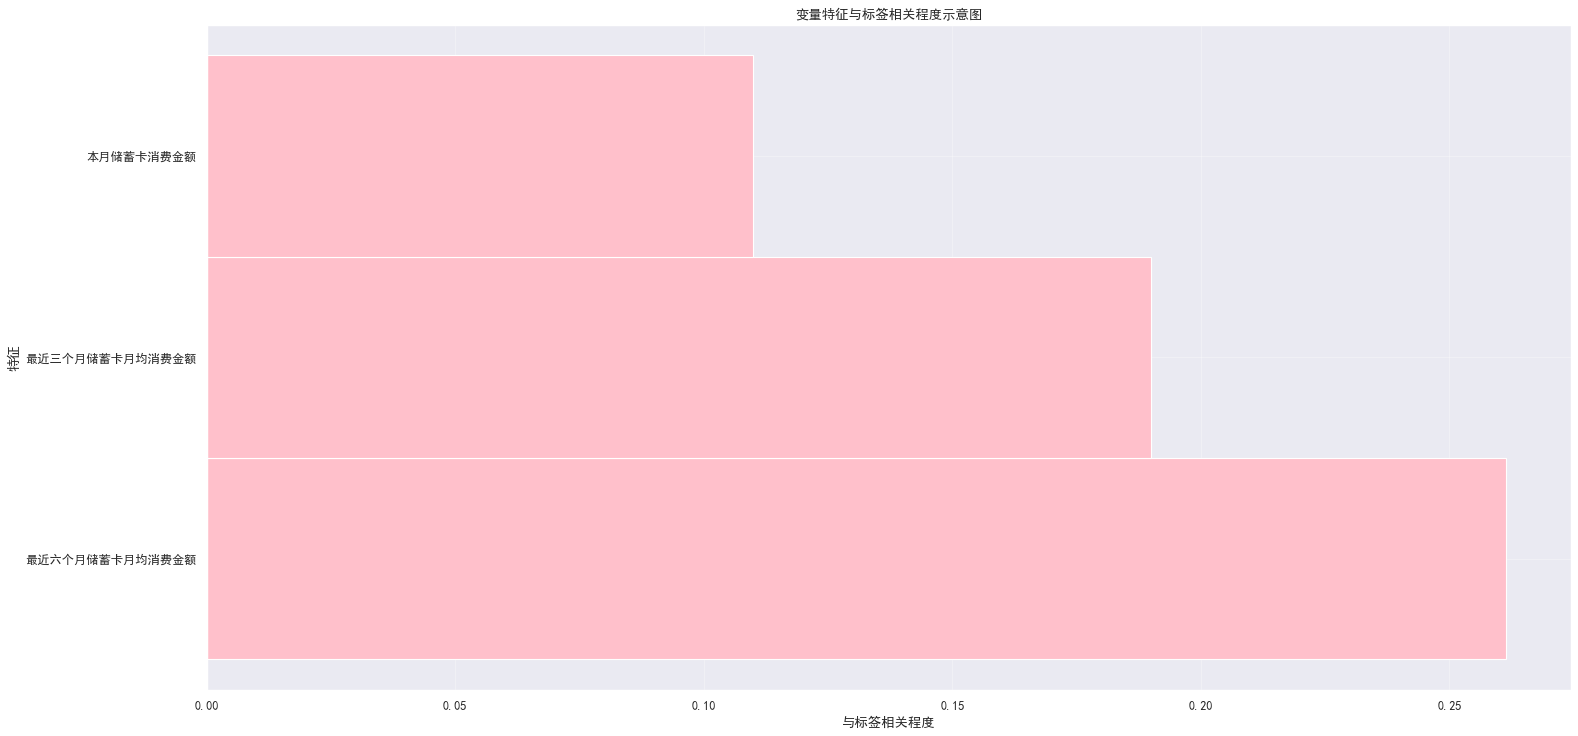

In [29]:
relativity_pic(b5)


# 3、数据探索与特征工程（二）：变量择取

In [30]:
feature_d1={}
feature_d1.update(b1)
feature_d1.update(b3)
feature_d1.update(b4)
feature_d1.update(b5)
#排序
feature_d=dict(sorted(feature_d1.items(),key=lambda x:x[1],reverse=True))
feature,relativity=[],[]
for x,y in feature_d.items():
    feature.append(x)
    relativity.append(y)
print(feature,relativity)


['最近6个月客户月平均资产总计', '6个月存款月日均金额', '最近3个月客户月平均资产总计', '3个月存款月日均金额', '资产总额', '最近六个月活期存款月日均余额', '最近三个月活期存款月日均余额', '存款金额', '本月活期存款月日均余额', '六个月月平均持有本币余额', '三个月月平均持有本币余额', '六个月月平均本币新增余额', '三个月月平均本币新增余额', '6个月理财月日均金额', '本期持有本币余额', '本期本币新增余额', '3个月理财月日均金额', '理财金额', '最近六个月储蓄卡月均消费金额', '客户持有的全部产品数量（24种产品）', '客户价值等级', '最近三个月储蓄卡月均消费金额', '活期存款最近开户距今月份', '活期存款平均开户时长', '六个月月平均持有外币余额', '三个月月平均持有外币余额', '本月储蓄卡消费金额'] [0.6787063477282165, 0.6783424632615347, 0.67697633728151, 0.675448641765414, 0.6745270349400735, 0.674154123624705, 0.6706709210571753, 0.6701670788205848, 0.6698756560428024, 0.6695973303724112, 0.6608550184704043, 0.6324115884197895, 0.5744378285614249, 0.5562782663547414, 0.503597042141881, 0.5029228952325966, 0.46236615141957427, 0.40201934754390706, 0.2613625805113151, 0.2519165366046623, 0.20815453253598876, 0.18991189671405123, 0.15566376949893035, 0.15218907097188727, 0.13267846235380532, 0.12972211795202082, 0.10985327602668826]


In [31]:
from matplotlib.font_manager import FontProperties

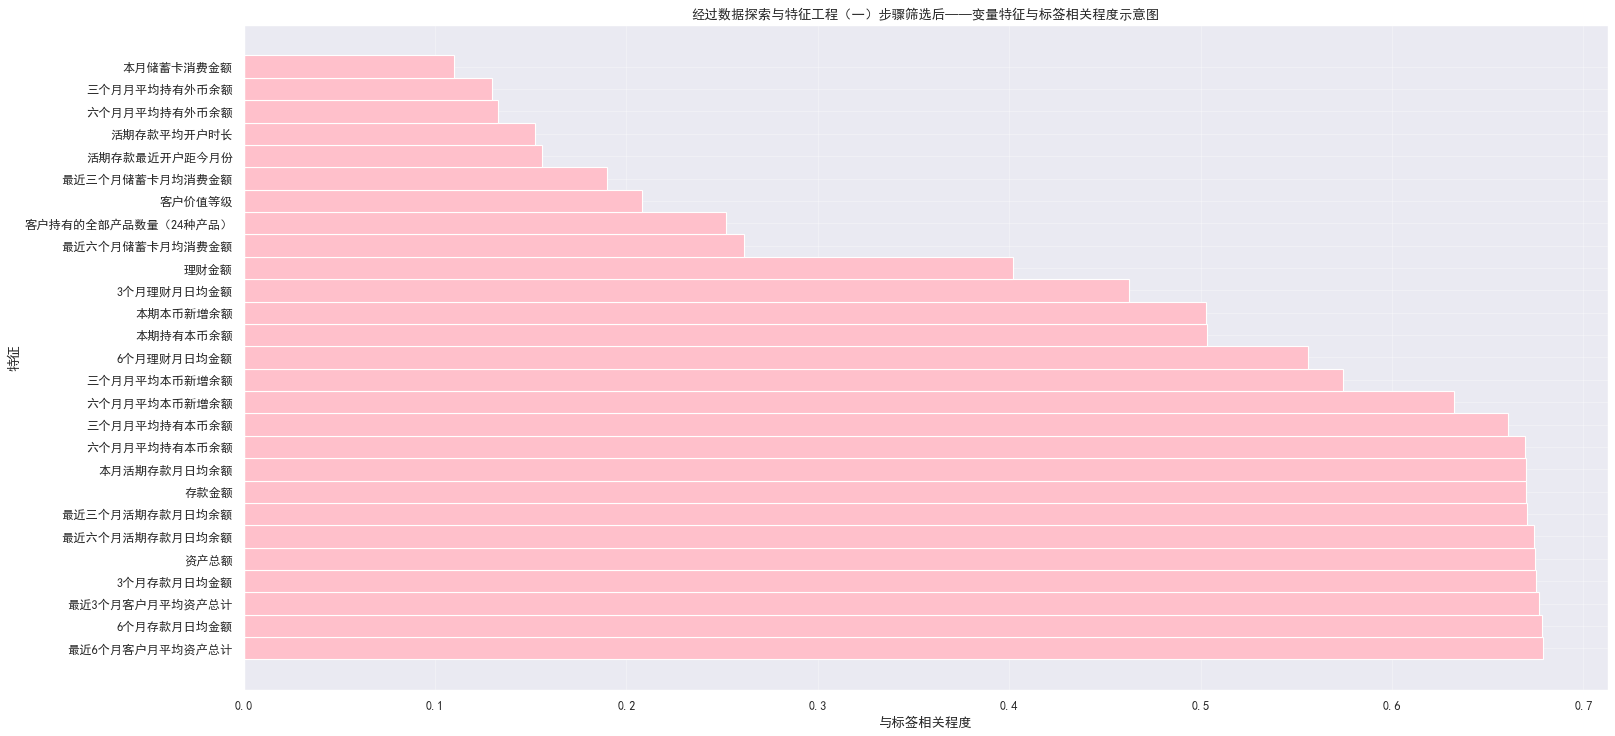

In [32]:
font={'family':'SimHei','weight':'bold','size':'12'}
plt.rc('font',**font)
plt.rc('axes',unicode_minus=False)
l_f,l_r=len(feature),len(relativity)

plt.figure(figsize=(22,11),dpi=80)
plt.barh(range(l_f),relativity,height=1,color='pink')
plt.yticks(range(l_r),feature)

plt.grid(alpha=0.3)
plt.xlabel('与标签相关程度')
plt.ylabel('特征')
plt.title('经过数据探索与特征工程（一）步骤筛选后——变量特征与标签相关程度示意图')
plt.show()

# 4、模型训练


In [33]:
# Separate features and labels
features = feature[:20]  #尝试去除相关程度后5位[:20]
label ='签约钱生钱理财标志'
X, y = data1345[features].values, data1345[label].values
X,y=X.astype('int'),y.astype('int')

for n in range(109,125):
    print("client", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

client 110 
  Features: [253920, 253920, 253732, 253732, 253914, 5045, 6054, 253914, 6054, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 1] 
  Label: 0
client 111 
  Features: [14484, 14484, 12232, 12232, 13288, 10385, 10204, 13288, 13058, 15106, 11995, -35, -2707, 0, -9914, -9914, 0, 0, 0, 5] 
  Label: 0
client 112 
  Features: [4445769, 4445769, 2657452, 2657452, 2904508, 10912, 12095, 2904508, 9898, 1370, 1798, 133, 851, 0, 799, 799, 0, 0, 17400000, 5] 
  Label: 0
client 113 
  Features: [686, 686, 687, 687, 687, 572, 687, 687, 687, 687, 687, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
client 114 
  Features: [21423, 21423, 21434, 21434, 21438, 17841, 21417, 21438, 21422, 21411, 21421, 7, 7, 0, 21, 21, 0, 0, 0, 3] 
  Label: 0
client 115 
  Features: [1373074, 258033, 1381769, 283948, 1385139, 4611, 5214, 282516, 3515, 5389, 4237, 291, -1447, 1115041, 1751, 1751, 1097821, 1102622, 0, 4] 
  Label: 1
client 116 
  Features: [978, 978, 571, 571, 554, 603, 571, 554, 554, 754, 554, -54, -133, 0, 0, 0, 0, 0, 0

In [34]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 13191
Test cases: 30779


In [35]:
#数据归一化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std_train=scaler.fit_transform(X_train)
X_std_test=scaler.transform(X_test)

In [36]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


C:\Users\86182\anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


# 5、效果检验与结果分析

## 预测

In [37]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 ... 0 0 1]
Actual labels:     [0 0 0 ... 0 0 1]


## ①accuracy

In [38]:
from sklearn.metrics import accuracy_scoreb

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.9730335618441145


## ②分类报告

In [41]:
#分类报告：预测签约or不签约分别的准确性
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     25306
           1       0.95      0.90      0.92      5473

    accuracy                           0.97     30779
   macro avg       0.96      0.94      0.95     30779
weighted avg       0.97      0.97      0.97     30779



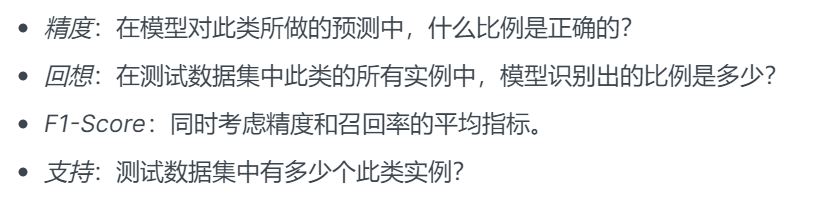

## ③混淆矩阵观察

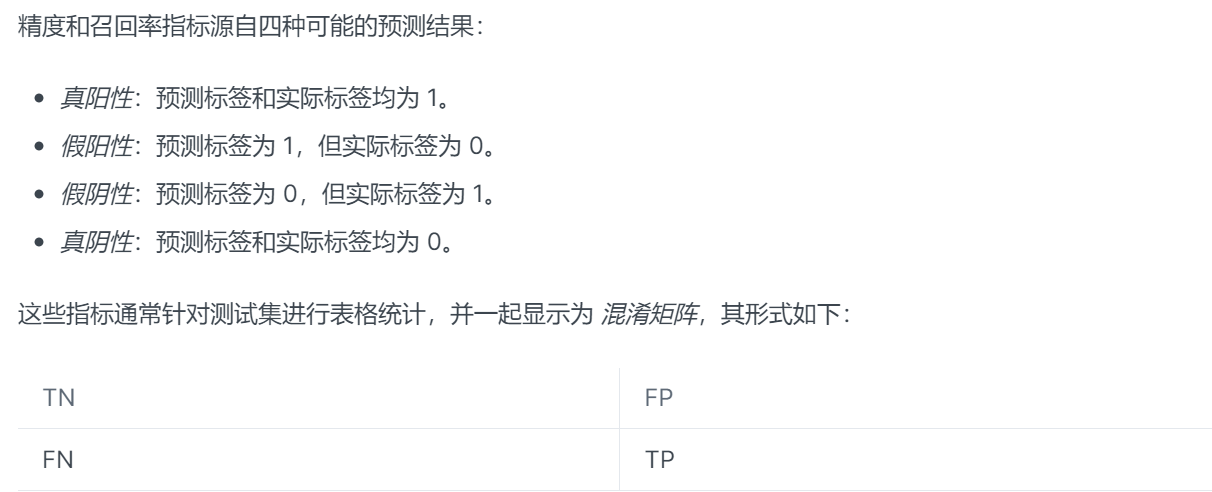

In [42]:
from sklearn.metrics import confusion_matrix

# 混淆矩阵呈现
cm = confusion_matrix(y_test, predictions)
print (cm)

[[25048   258]
 [  572  4901]]


## ④ROC

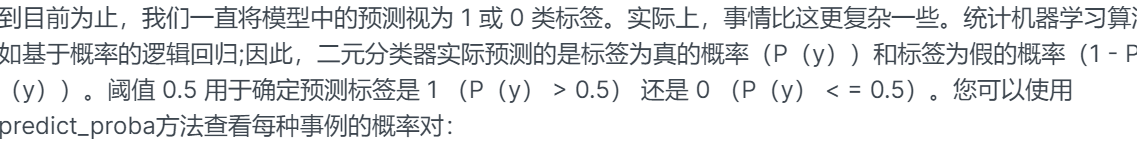

In [44]:
y_scores = model.predict_proba(X_test)
print(y_scores)


[[0.82976054 0.17023946]
 [0.50673231 0.49326769]
 [0.51290953 0.48709047]
 ...
 [0.56439676 0.43560324]
 [0.9735673  0.0264327 ]
 [0.         1.        ]]


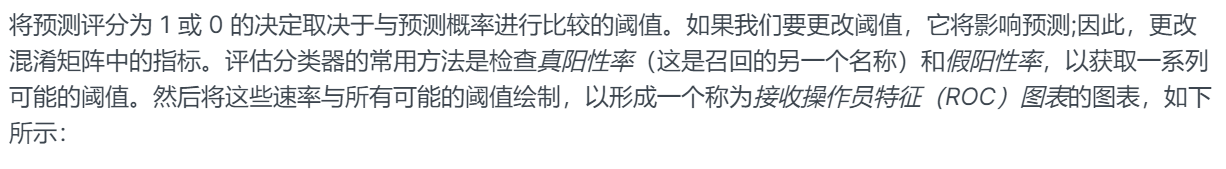

In [ ]:
#在此之前，我们在pipline中进行一下预处理，使之为建模作更好的准备

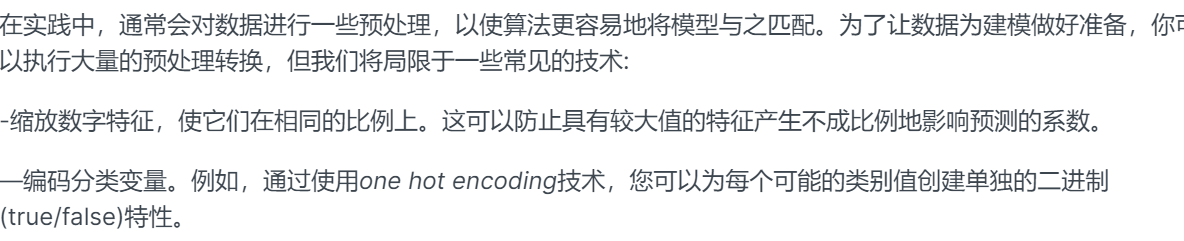

In [50]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# 定义数值列的预处理（规范化它们，使它们具有相同的刻度）
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


C:\Users\86182\anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


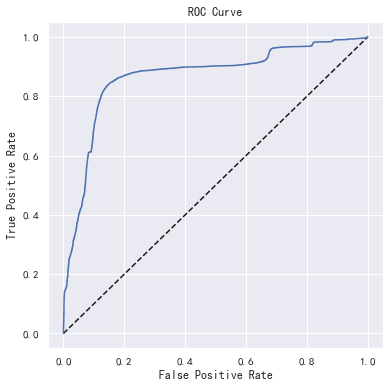

In [51]:
#ROC图表
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## ⑤AUC

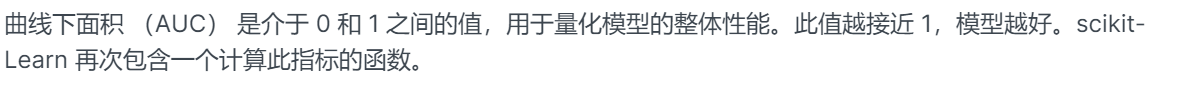

In [46]:

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.9293809205617414
